In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df=pd.read_csv("C:/WealthFolio/data/dataset/data.csv")

In [3]:
df.head(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
5,25,High School,Others,1,Rural,6,Single,Part-time,1,Rent,Townhouse,Female,Car,73406
6,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
7,56,Master's,Education,1,Suburban,34,Married,Part-time,7,Own,Townhouse,Female,Public transit,70066
8,36,Master's,Finance,4,Suburban,45,Married,Full-time,2,Own,Apartment,Female,Public transit,69636
9,40,Bachelor's,Education,4,Urban,21,Married,Full-time,6,Own,Apartment,Female,Biking,5188124


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [5]:
df.describe(include='all')

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
count,10000.000000,10000,10000,10000.000000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000,10000,1.000000e+04
unique,NaN,4,5,NaN,3,NaN,3,3,NaN,2,3,2,4,NaN
top,NaN,Bachelor's,Healthcare,NaN,Urban,NaN,Married,Full-time,NaN,Own,Single-family home,Male,Public transit,NaN
freq,NaN,4058,3035,NaN,7037,NaN,5136,5004,NaN,6018,4055,5123,4047,NaN
mean,44.021700,NaN,NaN,2.527000,NaN,24.858800,NaN,NaN,3.989600,NaN,NaN,NaN,NaN,8.168382e+05
std,15.203998,NaN,NaN,1.713991,NaN,14.652622,NaN,NaN,2.010496,NaN,NaN,NaN,NaN,1.821089e+06
min,18.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.104400e+04
25%,31.000000,NaN,NaN,1.000000,NaN,12.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,6.844600e+04
50%,44.000000,NaN,NaN,3.000000,NaN,25.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,7.294300e+04
75%,57.000000,NaN,NaN,4.000000,NaN,37.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,3.506675e+05


In [6]:
df.nunique()

Age                                 53
Education_Level                      4
Occupation                           5
Number_of_Dependents                 6
Location                             3
Work_Experience                     51
Marital_Status                       3
Employment_Status                    3
Household_Size                       7
Homeownership_Status                 2
Type_of_Housing                      3
Gender                               2
Primary_Mode_of_Transportation       4
Income                            7667
dtype: int64

In [7]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['Education_Level', 'Occupation', 'Location', 'Marital_Status',
       'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
       'Gender', 'Primary_Mode_of_Transportation'],
      dtype='object')
Numerical Variables are  ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']


Age


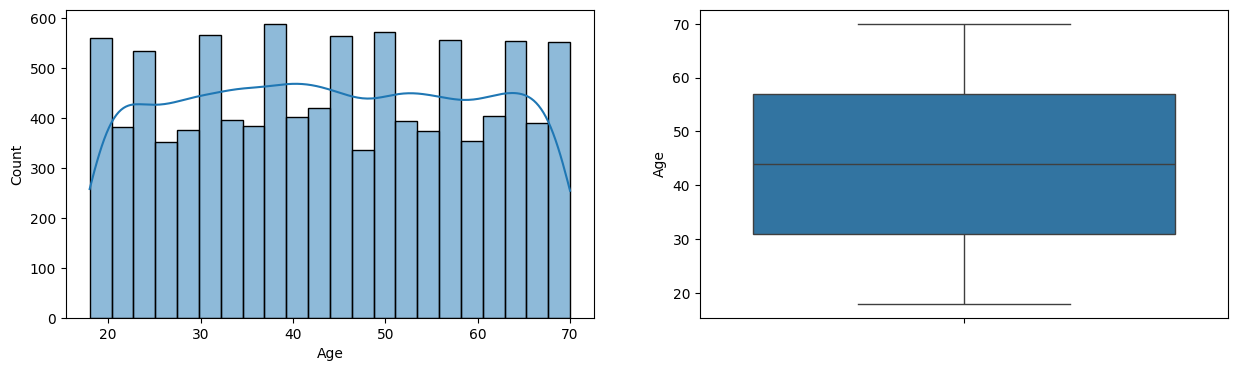

Number_of_Dependents


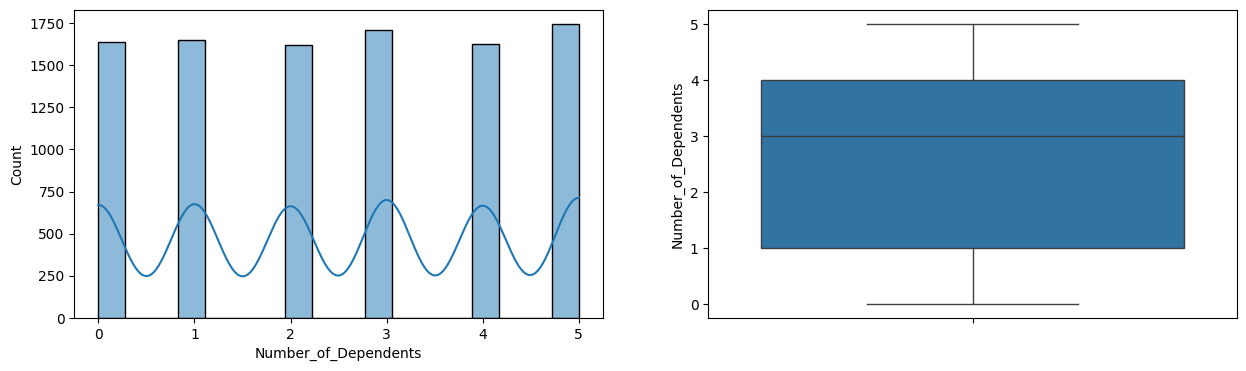

Work_Experience


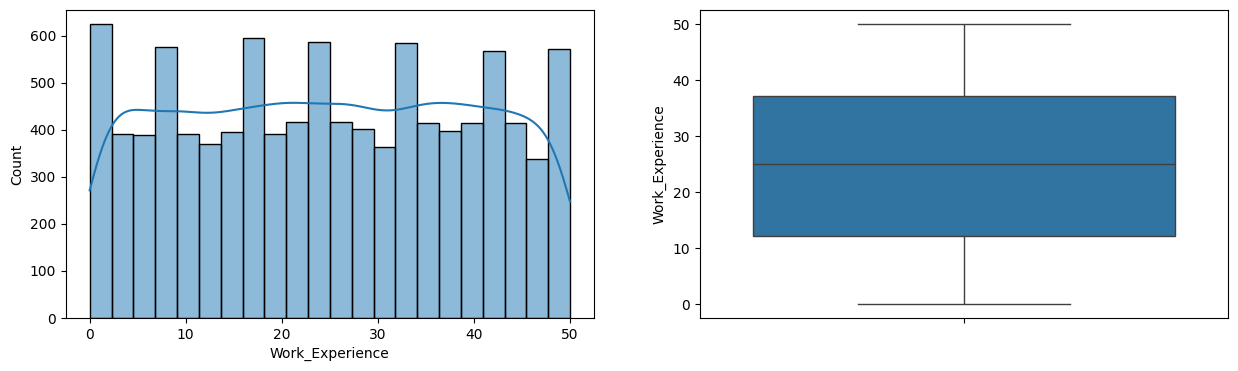

Household_Size


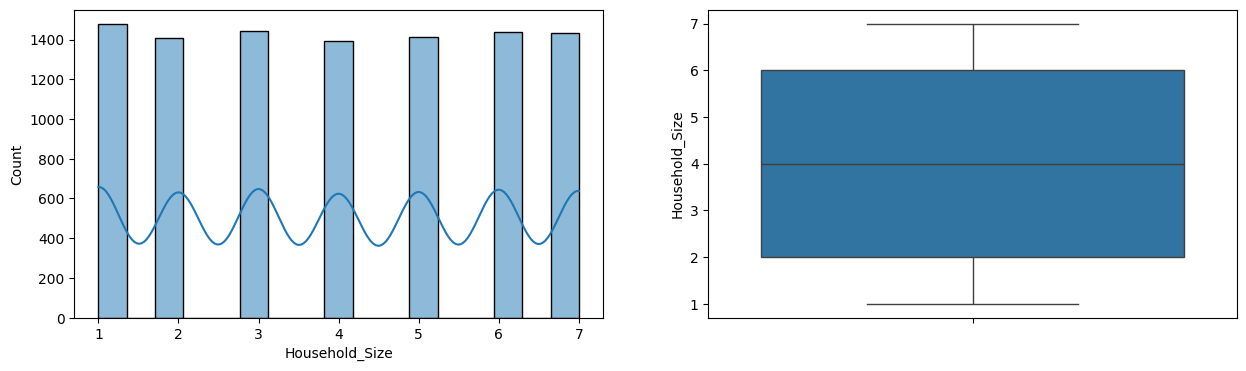

Income


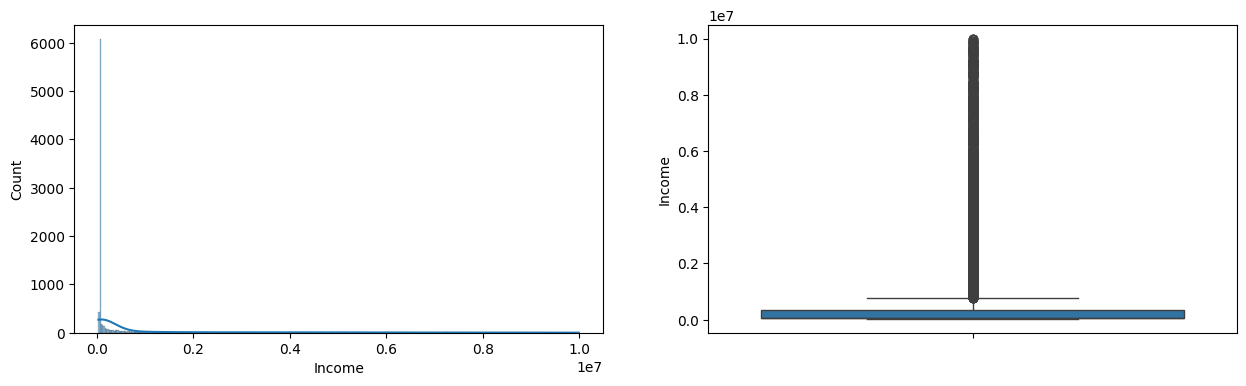

In [8]:
# Histogram and Boxplot
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show() 

Education_Level


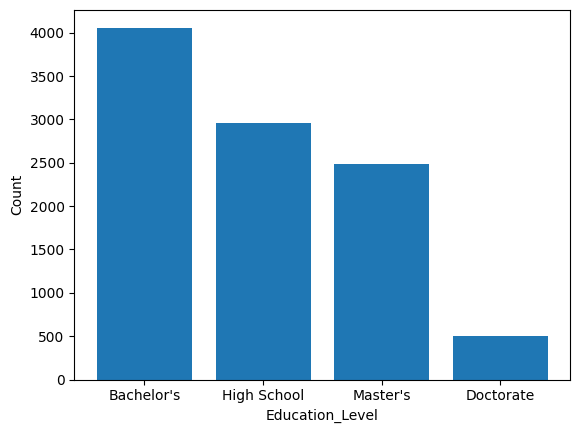

Occupation


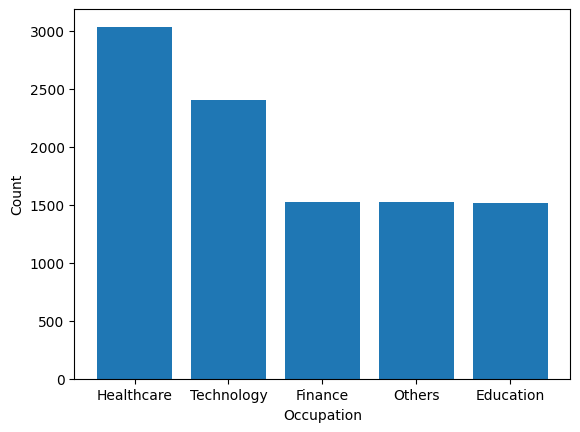

Location


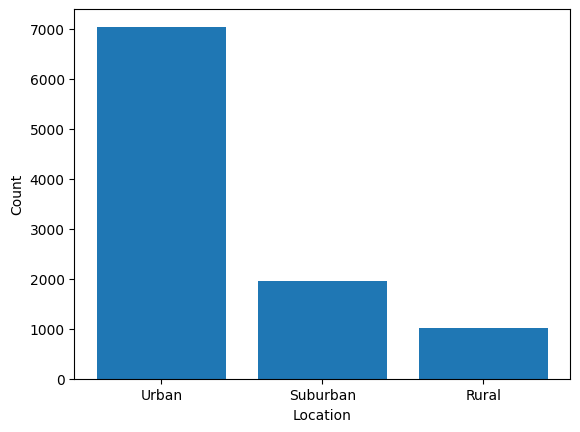

Marital_Status


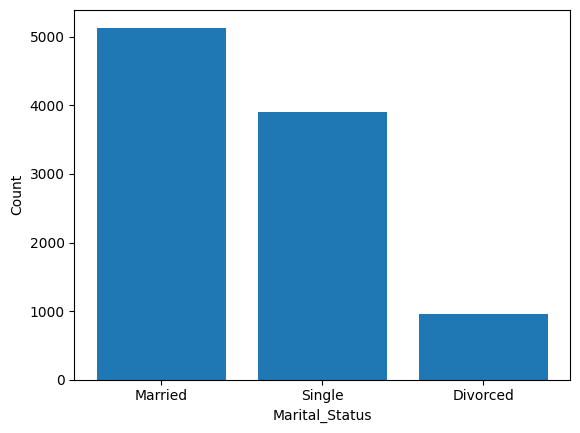

Employment_Status


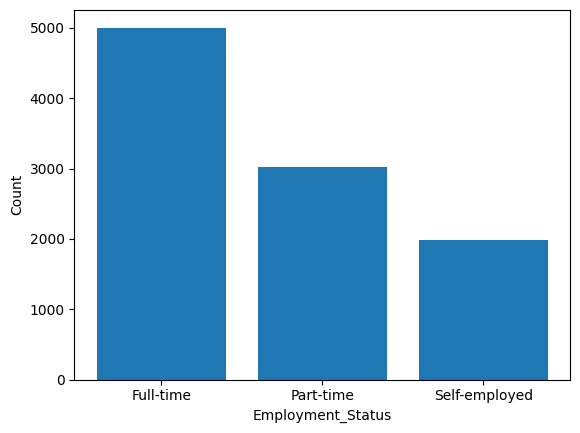

Homeownership_Status


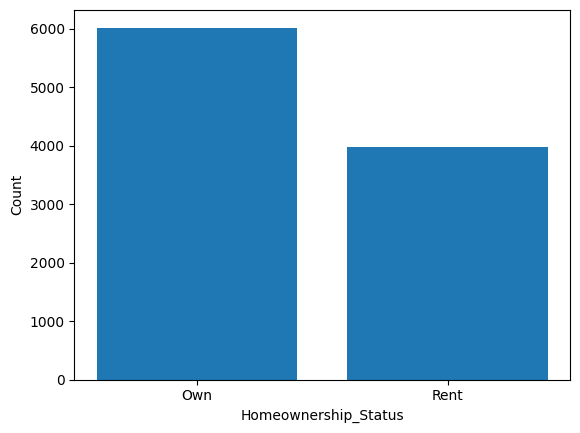

Type_of_Housing


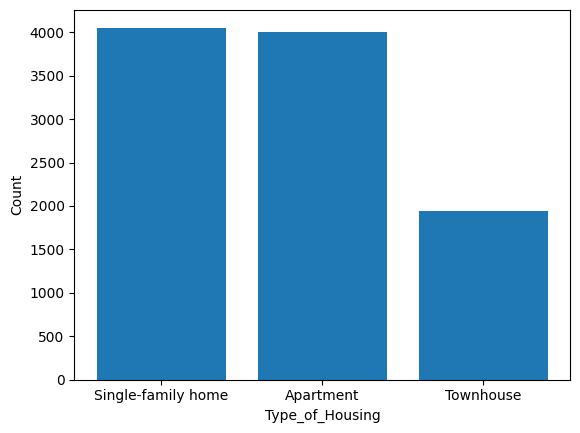

Gender


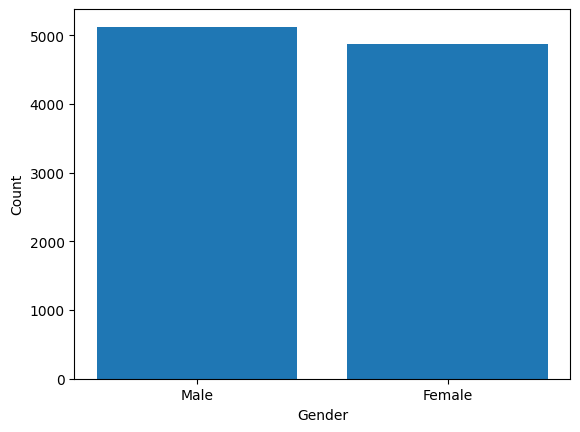

Primary_Mode_of_Transportation


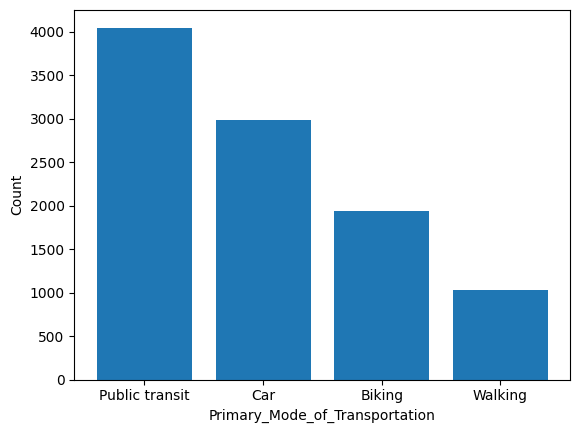

In [9]:
# Countplot for categorical columns
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Observations:
Mostly People educated from Bachelor's followed by High School, Masters and Doctorate
Mostly people has occupation in Healthcare and Technology
Mostly people belongs to Urban location
Mostly people are Married
Mostly people are Full Time employed and least people are self employed
Mostly people has their own house
Very least Family prefer Townhouse type of housing
Almost half families has male as primary household member and half has female
Mostly people prefer public transport or Car for transportation

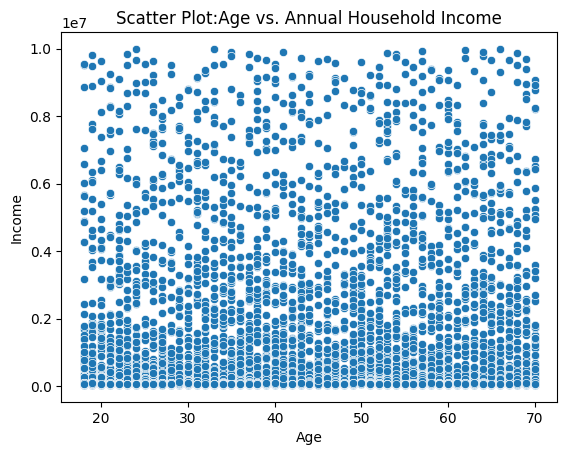

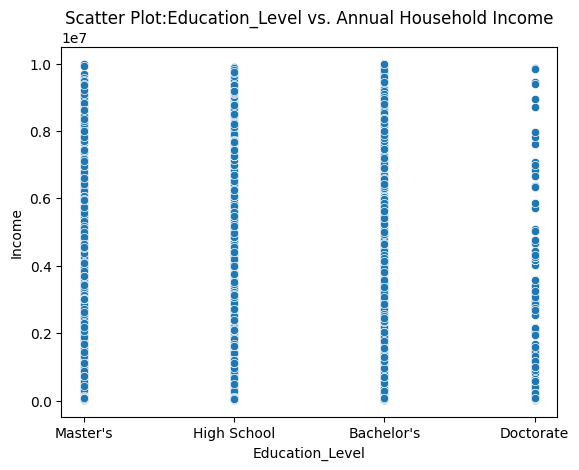

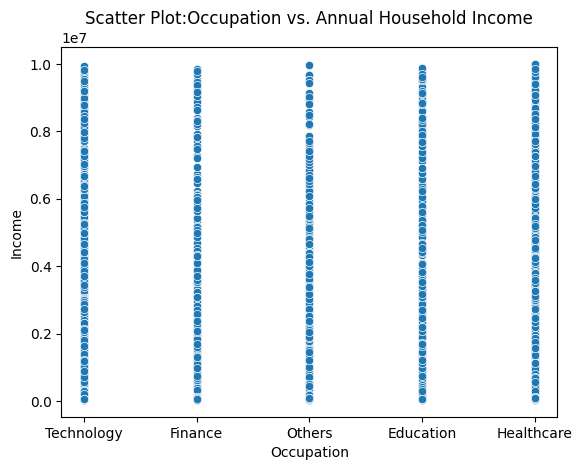

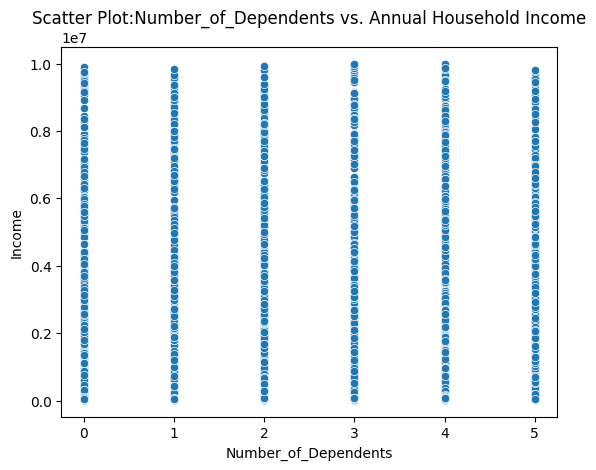

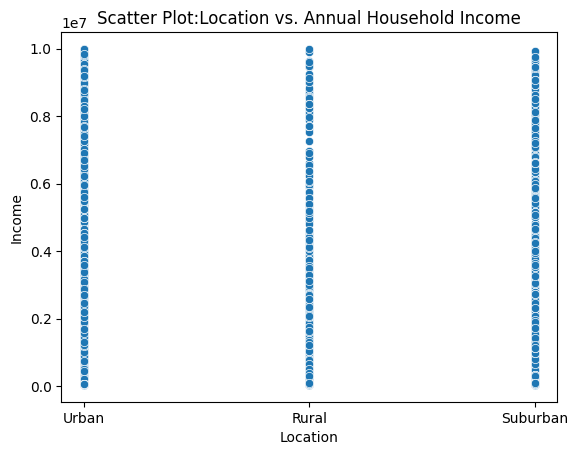

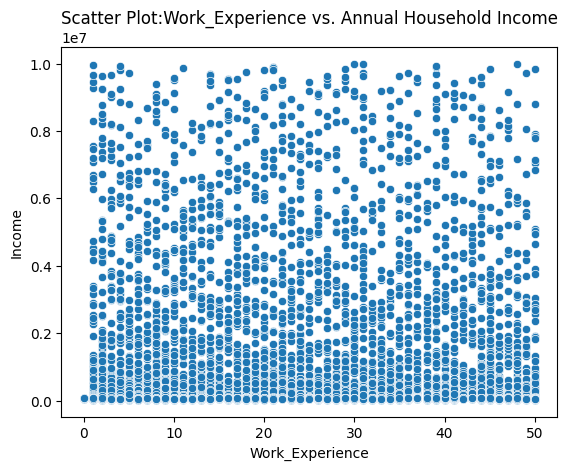

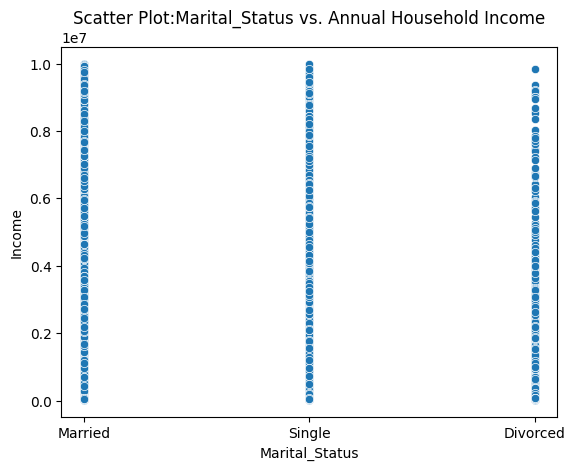

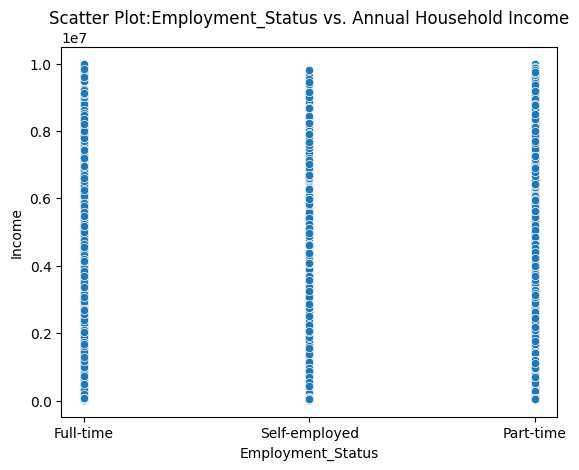

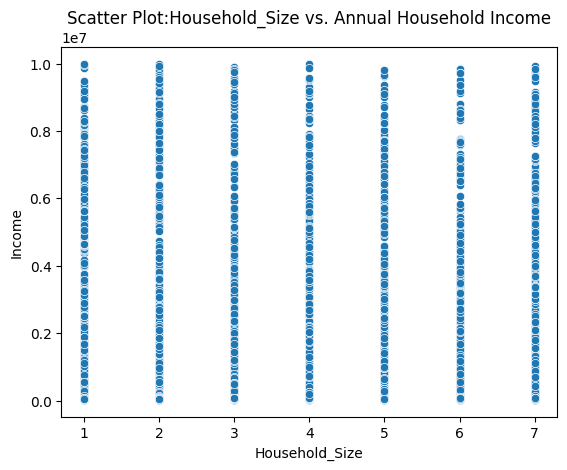

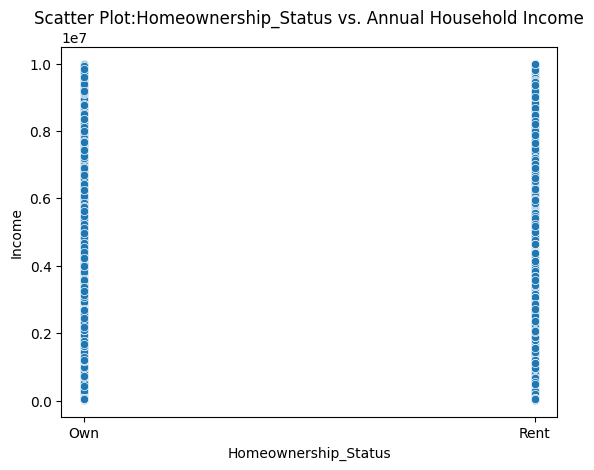

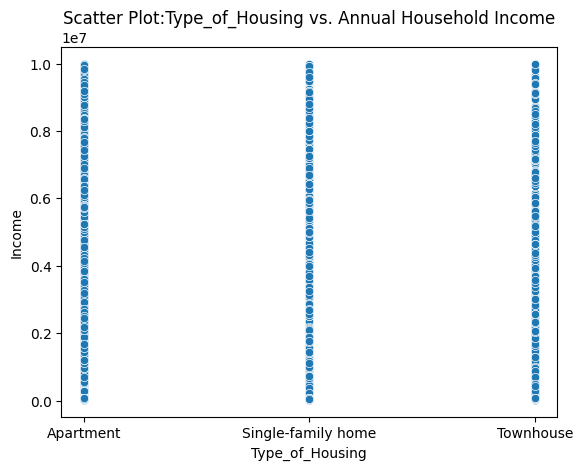

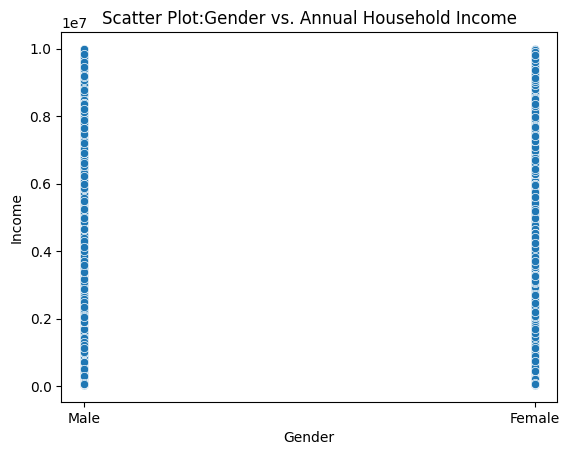

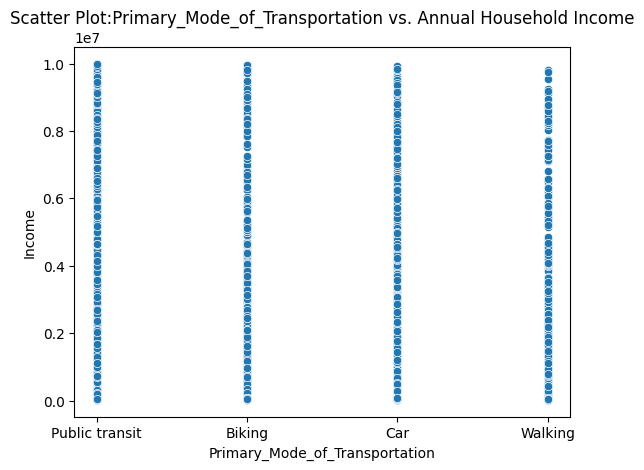

In [10]:
# ScatterPlot
for col in df:
    if col != "Income":
        sns.scatterplot(x=col, y='Income', data=df)
        plt.title(f'Scatter Plot:{col} vs. Annual Household Income')
        plt.show()

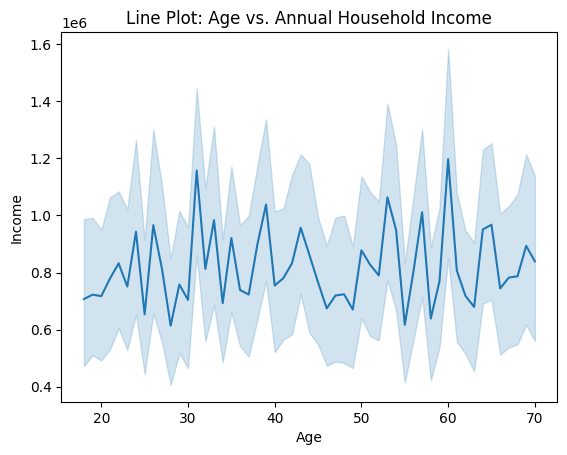

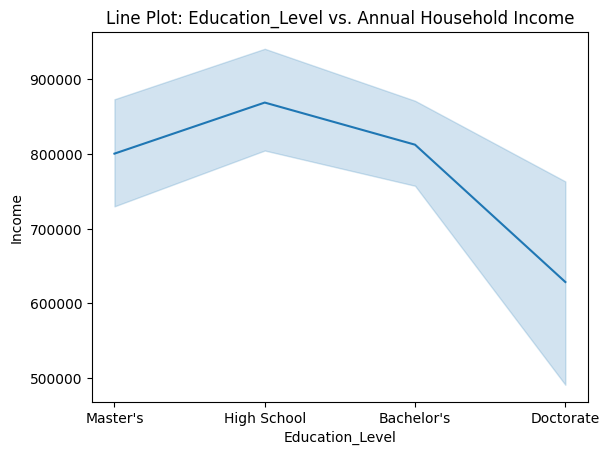

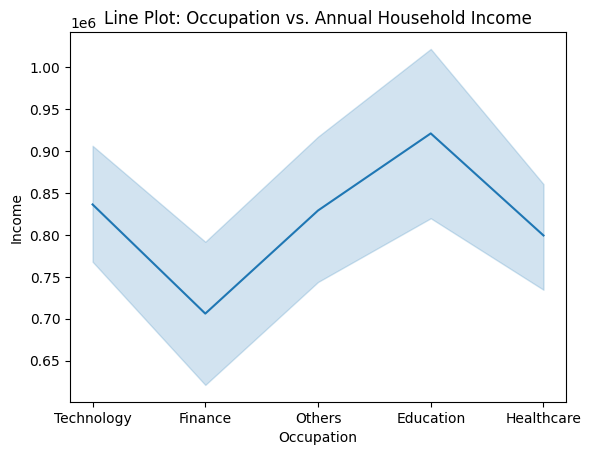

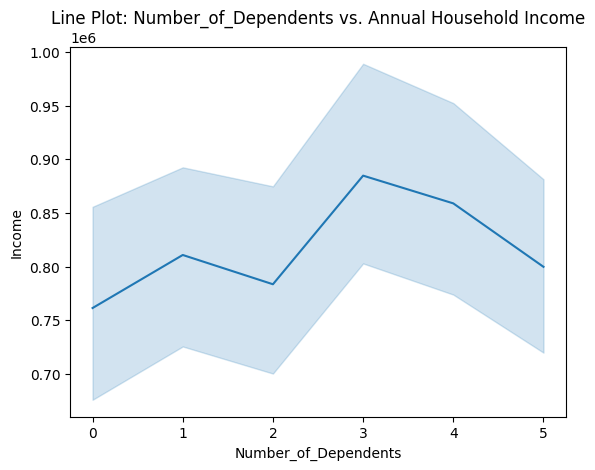

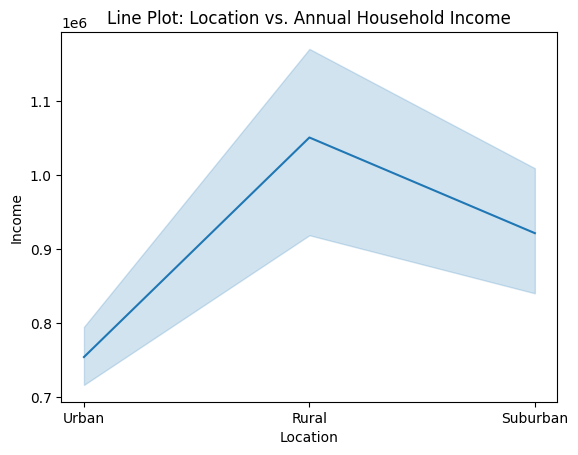

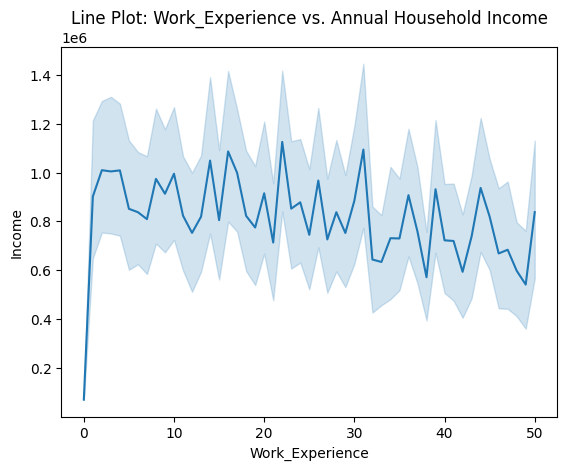

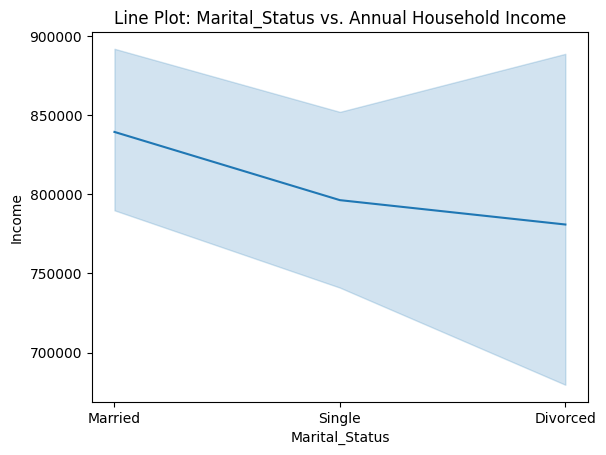

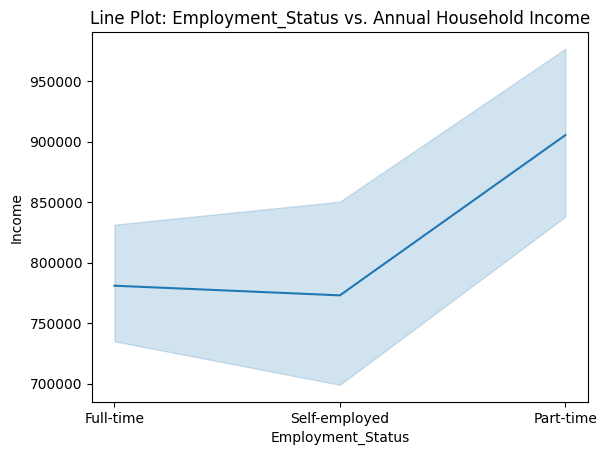

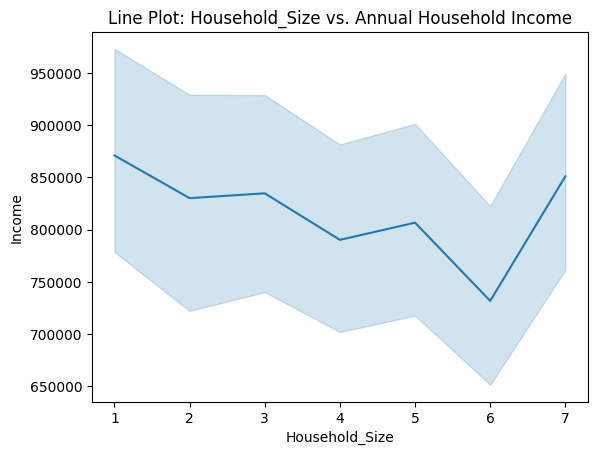

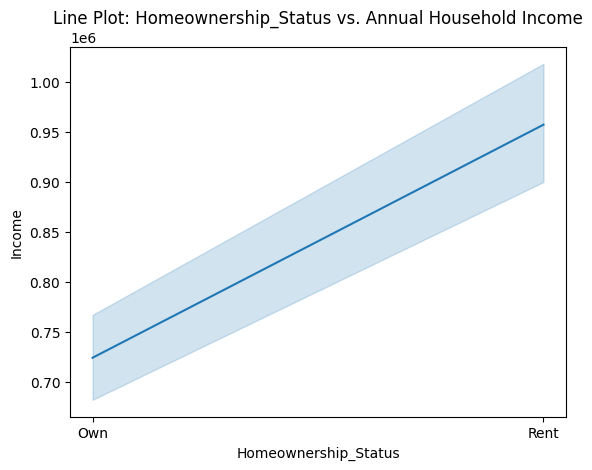

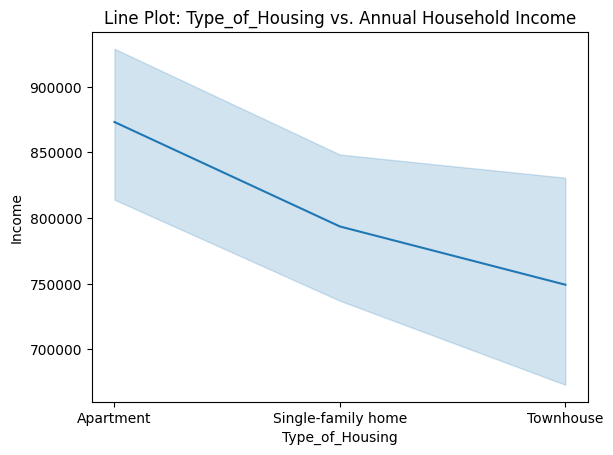

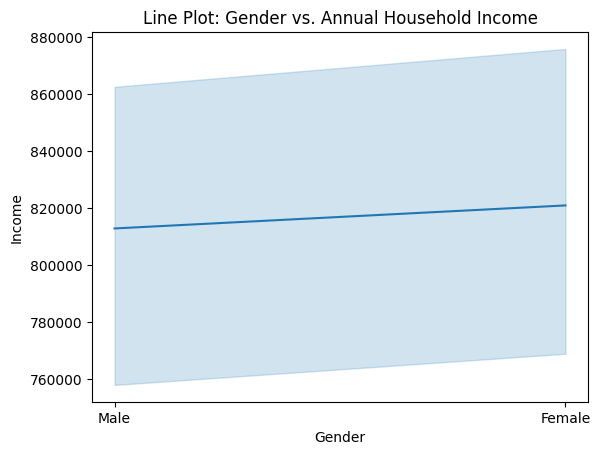

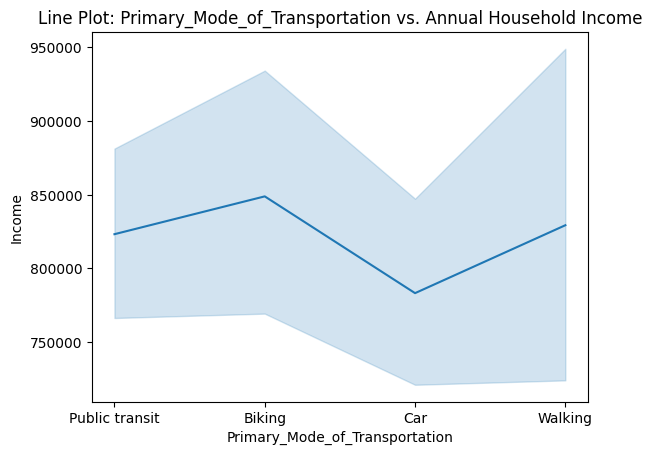

In [11]:
# Lineplot
for col in df:
    if col != "Income":
        sns.lineplot(x=col, y='Income', data=df)
        plt.title(f'Line Plot: {col} vs. Annual Household Income')
        plt.show()

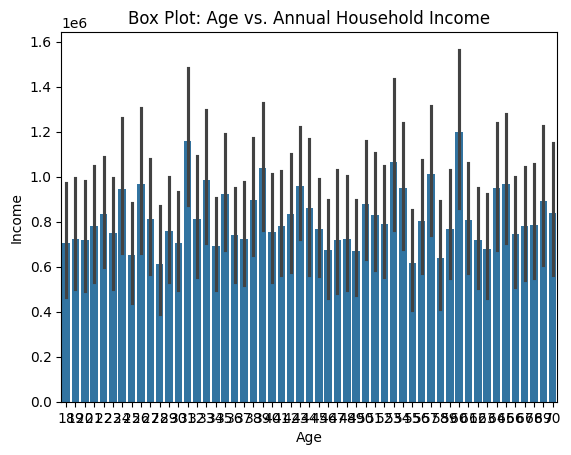

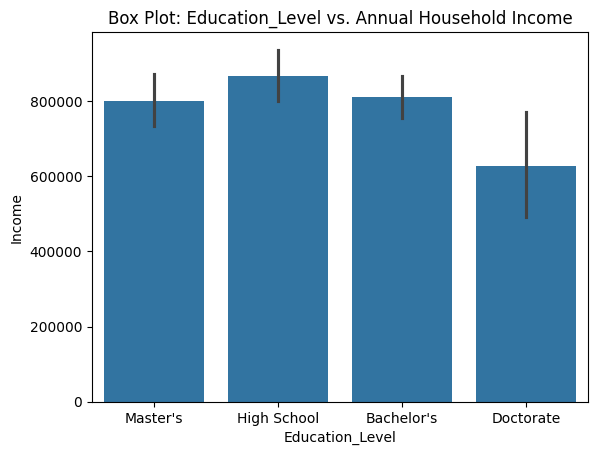

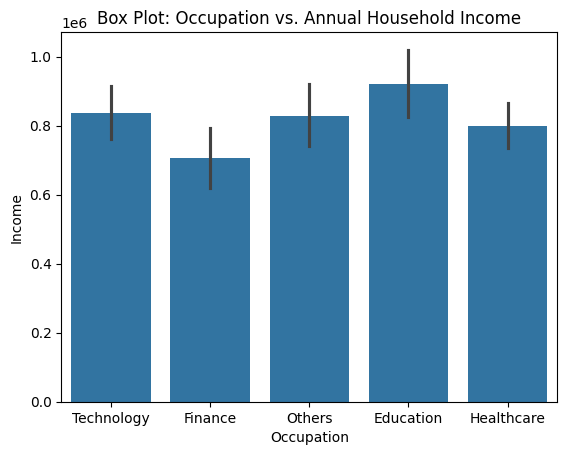

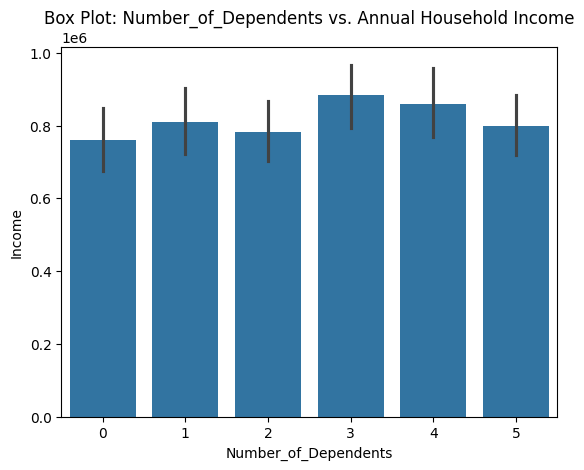

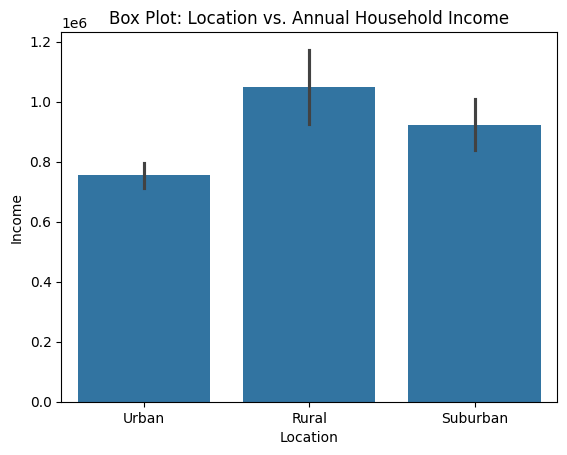

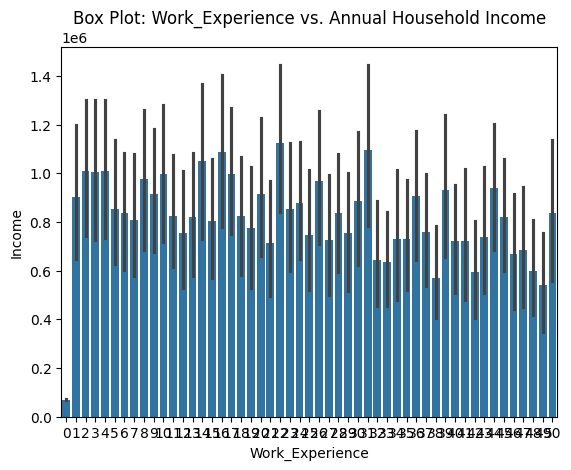

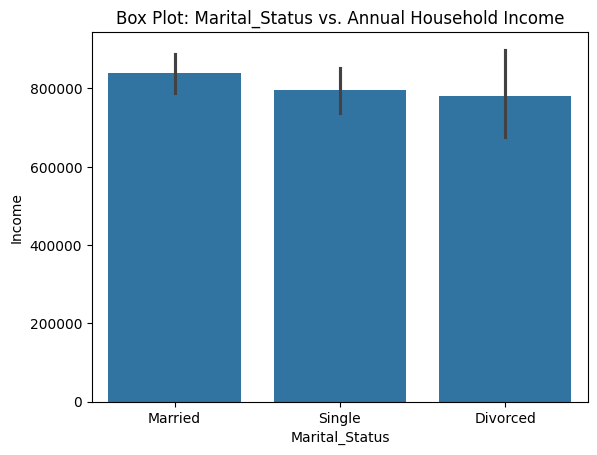

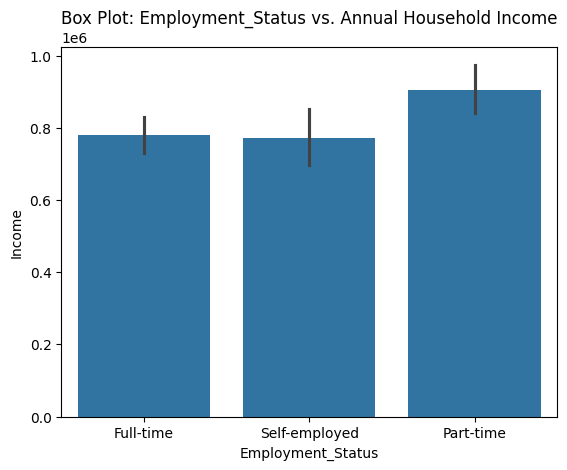

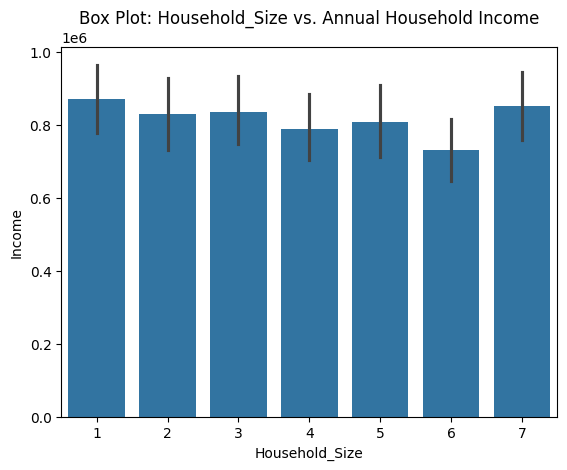

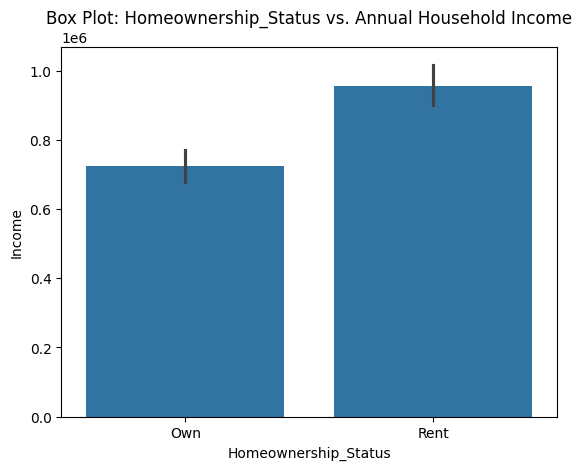

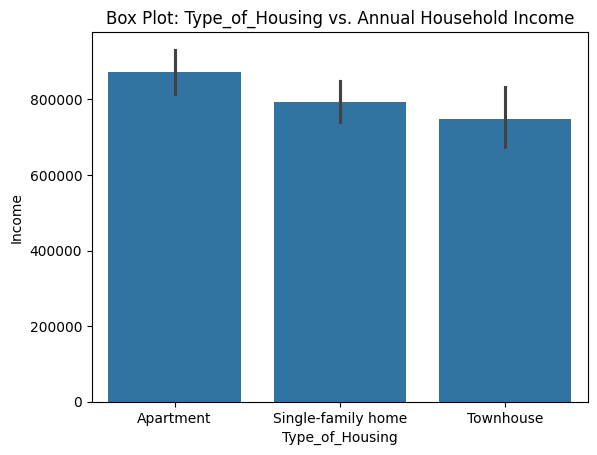

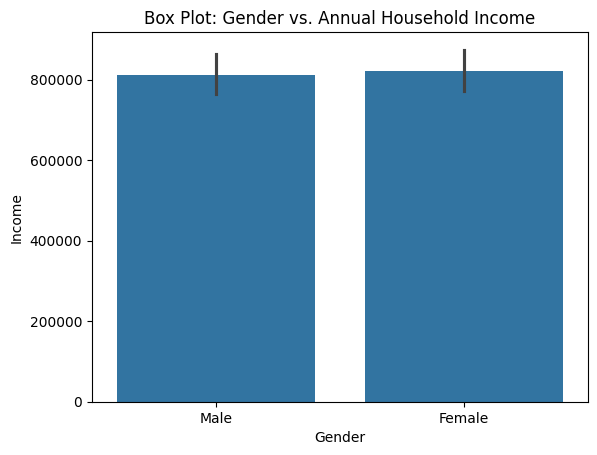

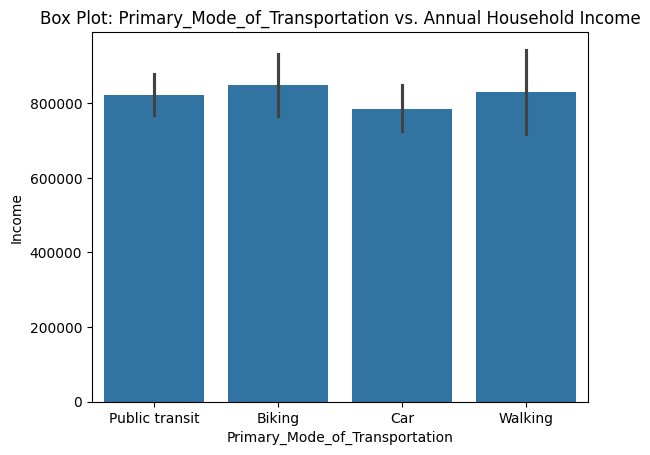

In [12]:
# Barplot
for col in df:
    if col != "Income":
        sns.barplot(x=col, y='Income', data=df)
        plt.title(f'Box Plot: {col} vs. Annual Household Income')
        plt.show()

 MultiVariate Analysis

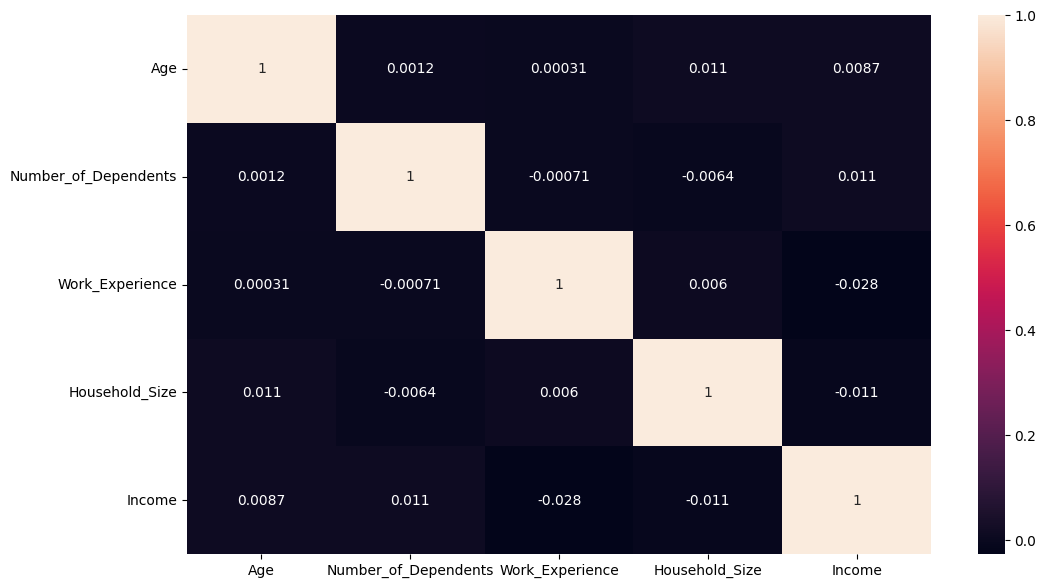

In [13]:
df1=df.select_dtypes(exclude=['object'])
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [14]:
from sklearn.model_selection import KFold
target = 'Income'
df_encoded = df.copy()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

for col in cat_cols:
    col_encoded = f'{col}_encoded'
    df_encoded[col_encoded] = 0
    
    for train_index, val_index in kf.split(df):
        X_train, X_val = df.iloc[train_index], df.iloc[val_index]
        means = X_train.groupby(col)[target].mean()
        df_encoded.loc[val_index, col_encoded] = df.loc[val_index, col].map(means)
    df_encoded[col_encoded].fillna(df[target].mean(), inplace=True)
    df_encoded.drop(columns=[col], inplace=True)

df_encoded.head()

C:\Users\srija\AppData\Local\Temp\ipykernel_23192\3132234140.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[805941.18071066 805941.18071066 858620.         ... 828724.91712707
 858620.         858620.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_encoded.loc[val_index, col_encoded] = df.loc[val_index, col].map(means)
C:\Users\srija\AppData\Local\Temp\ipykernel_23192\3132234140.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income,Education_Level_encoded,Occupation_encoded,Location_encoded,Marital_Status_encoded,Employment_Status_encoded,Homeownership_Status_encoded,Type_of_Housing_encoded,Gender_encoded,Primary_Mode_of_Transportation_encoded
0,56,5,21,7,72510,791235.058180,842067.163960,759907.139166,854675.309784,769995.875312,729055.862091,871126.441635,829088.252560,817953.916769
1,69,0,4,7,75462,843562.062922,702925.073625,721066.661319,777937.093981,770263.858063,707251.749948,830639.164997,791507.496469,829917.272610
2,46,1,1,7,71748,816229.082895,842067.163960,759907.139166,784303.358387,769995.875312,729055.862091,794111.565217,814021.547973,789724.232993
3,32,2,32,1,74520,890506.205895,829241.925446,766715.133452,851647.219320,795108.850709,727030.938213,909297.603550,828208.882338,765371.293460
4,60,3,15,4,640210,818371.739957,705100.010569,762556.038961,842011.658649,779729.829923,730327.306110,772867.262179,805316.272462,861098.861689


 Train-test split

In [15]:
x=df_encoded.drop(["Income"],axis=1)
y=df_encoded["Income"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

 Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

x_train_scaled.head()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Education_Level_encoded,Occupation_encoded,Location_encoded,Marital_Status_encoded,Employment_Status_encoded,Homeownership_Status_encoded,Type_of_Housing_encoded,Gender_encoded,Primary_Mode_of_Transportation_encoded
9254,0.500000,0.8,0.54,1.000000,0.743339,0.554512,0.110182,0.158188,1.000000,0.083041,0.395382,0.448002,0.646212
1561,0.519231,0.4,0.38,1.000000,0.734191,0.454272,0.505734,0.963777,0.185585,1.000000,0.313433,0.730313,0.334614
1670,0.961538,1.0,0.52,0.666667,0.065924,0.871623,0.934945,0.082032,0.470672,0.000000,0.406329,0.000000,0.387391
6087,0.673077,0.0,0.50,0.000000,0.700596,0.650210,0.129494,0.963777,0.185585,0.075329,1.000000,0.544726,0.743718
6669,0.500000,0.4,0.32,0.833333,0.734191,0.650210,0.129494,0.963777,0.185585,0.075329,0.108002,0.730313,0.907421


 Model Creation

1. Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

2. Gradient Boosting Regressor

In [19]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

3. Elastic Net Regression

In [20]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(x_train, y_train)
y_pred_en = en.predict(x_test)

4. Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

5. Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

6. Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

Model Selection
Comparing All Evaluation Metrics in Increasing Order

c:\WealthFolio\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\srija\AppData\Local\Temp\ipykernel_23192\1230198849.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_comparison = pd.concat([model_comparison, add_model_metrics('Gradient Boosting Regressor', y_test, y_pred_gbr)], ignore_index=True)
c:\WealthFolio\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error

                         Model           MAE           MSE          RMSE  \
0  Gradient Boosting Regressor  1.091026e+06  3.096034e+12  1.759555e+06   
1            Linear Regression  1.103956e+06  3.135448e+12  1.770720e+06   
2       Elastic Net Regression  1.104061e+06  3.135502e+12  1.770735e+06   
3             Lasso Regression  1.103956e+06  3.135448e+12  1.770720e+06   
4      Decision Tree Regressor  1.304803e+06  6.583162e+12  2.565767e+06   
5      Random Forest Regressor  1.188199e+06  3.233234e+12  1.798120e+06   

         R²  
0  0.018647  
1  0.006154  
2  0.006137  
3  0.006154  
4 -1.086672  
5 -0.024842  


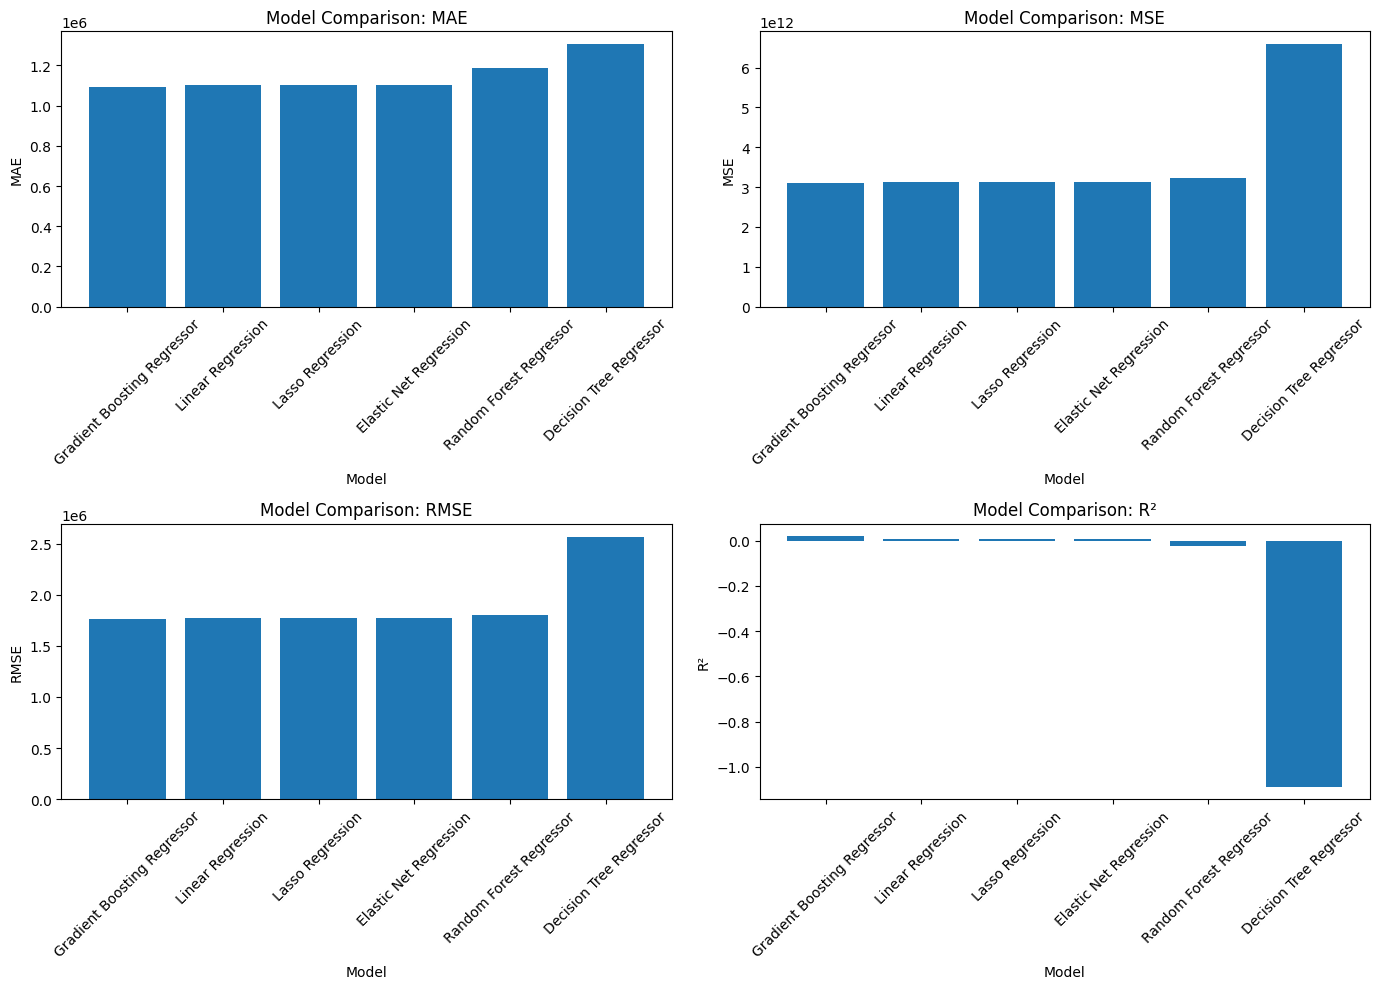

In [24]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize an empty DataFrame for model comparison
model_comparison = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²'])

# Define a function to add the model's metrics to the DataFrame
def add_model_metrics(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    return pd.DataFrame({
        'Model': [model_name],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R²': [r2]
    })

# Gradient Boosting Regressor
model_comparison = pd.concat([model_comparison, add_model_metrics('Gradient Boosting Regressor', y_test, y_pred_gbr)], ignore_index=True)

# Linear Regression
model_comparison = pd.concat([model_comparison, add_model_metrics('Linear Regression', y_test, y_pred_lr)], ignore_index=True)

# Elastic Net Regression
model_comparison = pd.concat([model_comparison, add_model_metrics('Elastic Net Regression', y_test, y_pred_en)], ignore_index=True)

# Lasso Regression
model_comparison = pd.concat([model_comparison, add_model_metrics('Lasso Regression', y_test, y_pred_lasso)], ignore_index=True)

# Decision Tree Regressor
model_comparison = pd.concat([model_comparison, add_model_metrics('Decision Tree Regressor', y_test, y_pred_dt)], ignore_index=True)

# Random Forest Regressor
model_comparison = pd.concat([model_comparison, add_model_metrics('Random Forest Regressor', y_test, y_pred_rf)], ignore_index=True)

# Print the model comparison table
print(model_comparison)

# Plotting all evaluation metrics in increasing order
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    sorted_comparison = model_comparison.sort_values(by=metric, ascending=(metric != 'R²'))
    plt.subplot(2, 2, i)
    plt.bar(sorted_comparison['Model'], sorted_comparison[metric])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'Model Comparison: {metric}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()